# Assignment_1

## 1.Feedforward: Building a ReLu 2 Layer neural network

### 1.Plot (draw) a network with: 
2 inputs, 2 hidden layers (where the first layer contains 3 hidden units and the second contains 2 hidden units) and a 3-class output (use a softmax function)

<img src="fig1.png" style="width:600px;height:400px;">

### 2.Write out the mathematical equation for this network


$$h_1 = W_1X + B_1$$
$$a_1 = ReLU(h_1)$$
$$h_2 = W_2a_1 + B_2$$
$$a_2 = ReLU(h_2)$$
$$Output = softmax(Va_2 + C)$$


### 3.Write out the function in python, call it ff_nn_2_ReLu(...)

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random
import pandas as pd

In [2]:
# --- Activation Functions(taken from example)  ----

ReLU = np.vectorize(lambda z: np.fmax(0,z))

In [3]:
# --- Softmax Function(taken from example) ----

softmax = lambda z: np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

In [4]:
# --- Forward Propagation ----

def ff_nn_2_ReLu(X,parameters):
     
    W1, B1, W2, B2, V, C = parameters
    
    # Forward pass
    a1 = W1.dot(X) + B1
    H1 = ReLU(a1)
    a2 = W2.dot(H1) + B2
    H2 = ReLU(a2)
    a3 = V.dot(H2) + C
    a3 = np.transpose(a3)
    Y_hat = softmax(a3)
    
    return Y_hat

### 4.Suppose you have the following set of weight matrices, what are the class probabilities associated with the forward pass of each sample?

In [5]:
# --- 2 Layer neural network ----

W1 = np.array([[1,0],[-1,0],[0,0.5]])
B1 = np.array([0,0,1]).reshape(3,1)
W2 = np.array([[1,0,0],[-1,-1,0]])
B2 = np.array([1,-1]).reshape(2,1)
V = np.array([[1,1],[0,0],[-1,-1]])
C = np.array([1,0,0]).reshape(3,1)
X = np.array([[1,0,0],[-1,-1,1]])
parameters = [W1, B1, W2, B2, V, C]

ff_nn_2_ReLu(X,parameters)

array([[0.94649912, 0.04712342, 0.00637746],
       [0.84379473, 0.1141952 , 0.04201007],
       [0.84379473, 0.1141952 , 0.04201007]])

## 2.Gradient Descent
The Rosenbrock function is a famous non-convex function that is used to ex- plore optimization algorithms. This simple 2-D function has some very tricky structure.

### 1.What are the partial derivatives of f with respect to x and to y?

$$\frac{df}{dx} = -2(1-x) + 200(y-x^2)(-2x)$$
$$\frac{df}{dy} = 200(y-x^2)$$

### 2.Create a visualization of the contours of the Rosenbrock function.

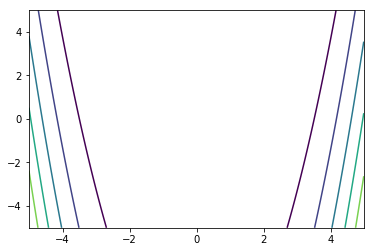

In [6]:
###########################
# The Rosenbrock function #
###########################

def rosenbrock(x,y):
    return (1-x)**2+100*(y-x**2)**2

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X,Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 3.Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
# --- Defining gradient ----

def grad_f(vector):
    x, y = vector
    df_dx = 400*x**3-400*x*y-2*x-2 
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])

In [8]:
# --- Compute the gradient ---

def grad_descent(starting_point=None, iterations=50, learning_rate=0.005):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

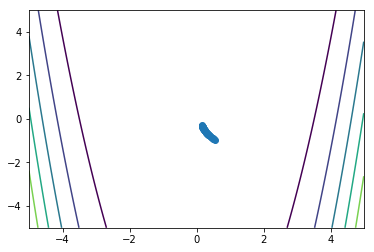

In [9]:
# --- Visualize Trajectory with learning rate = 0.0001---

np.random.seed(10)
traj = grad_descent(learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


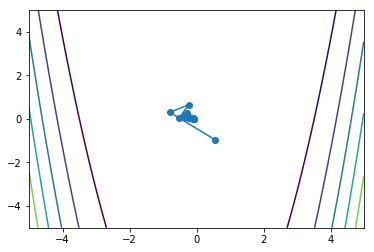

In [10]:
# --- Visualize Trajectory with learning rate = 0.005---

np.random.seed(10)
traj = grad_descent()

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


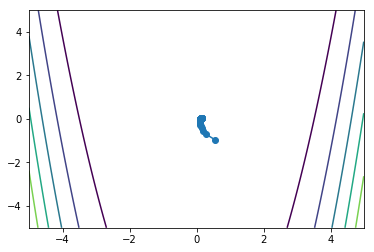

In [11]:
# --- Visualize Trajectory with learning rate = 0.001---

np.random.seed(10)
traj = grad_descent(learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


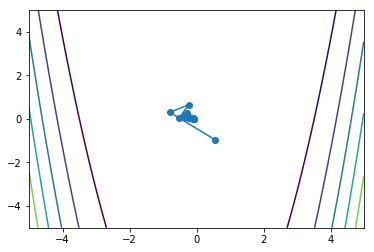

In [12]:
# --- Visualize Trajectory with learning rate = 0.0001---

np.random.seed(10)
traj = grad_descent(learning_rate=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')


### 4.Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [13]:
# --- Compute the gradient with momentum ---

def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)
    

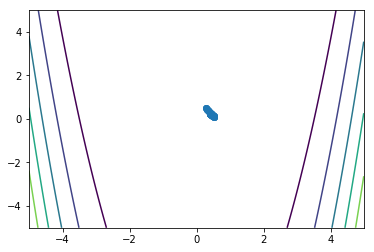

In [14]:
# --- Visualizing trajectory with alpha = .9 and epsilon = 0.0001--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=.9)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

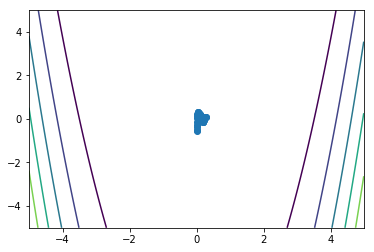

In [15]:
# --- Visualizing trajectory with alpha = .9 and epsilon = 0.0005--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0005, alpha=.9)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

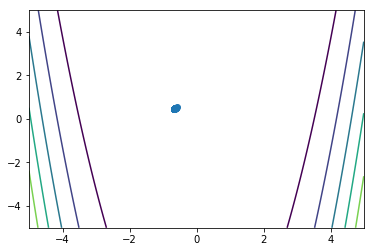

In [16]:
# --- Visualizing trajectory with alpha = .5 and epsilon = 0.0001--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

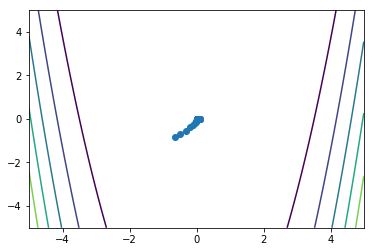

In [17]:
# --- Visualizing trajectory with alpha = .5 and epsilon = 0.0005--

traj = grad_descent_with_momentum(iterations=50, epsilon=0.0005, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3.Backprop

### 1.For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

For the network with cross-entropy as the loss funciton.
$$h_1 = W_1X + B_1$$
$$a_1 = ReLU(h_1)$$
$$h_2 = W_2a_1 + B_2$$
$$a_2 = ReLU(h_2)$$
$$Output = softmax(Va_2 + C)$$
$$L(y,\hat{y}) = - \sum\limits_{i = 1}^{3} y_ilog\hat{y}$$

The derive expressions of the gradient of the Loss function are:
$$\frac{dL}{dC} = \sum\limits_{i = 1}^{3} (y_i - \hat{y})$$
$$\frac{dL}{dV} =  (y_i - \hat{y})a_2$$
$$\frac{dL}{dB_2} = \sum\limits_{i = 1}^{3} (V^T(y_i - \hat{y}))a_2 * (h_2 > 0)$$
$$\frac{dL}{dW_2} = ((V^T(y_i - \hat{y}))a_2)a_1 * (h_2 > 0)$$
$$\frac{dL}{dB_1} = \sum\limits_{i = 1}^{3} W_2 ((V^T(y_i - \hat{y}))a_2) * (h_2 > 0) * (h_1 > 0)$$
$$\frac{dL}{dW_1} = ((W_2(V^T(y_i - \hat{y}))a_2)a_1)X * (h_2 > 0) * (h_1 > 0)$$

### 2.Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [130]:
# --- computes the gradient with the loss function cross-entropy

def grad_f(X,parameters):
     
    W1, B1, W2, B2, V, C = parameters
    
    a1 = W1.dot(np.transpose(x)) + B1
    H1 = ReLU(a1)
    a2 = W2.dot(H1) + B2
    H2 = ReLU(a2)
    y_hat = softmax(V.dot(H2) + C)
    
    d_C = (y_hat - y).sum(axis = 1)
    d_V = (y_hat - y).dot(H2.T)
    d_B2 = ((V.T.dot((y_hat - y))) * (H2 > 0)).sum(axis=1)
    d_W2 = ((V.T.dot((y_hat - y))) * (H2 > 0)).dot(H1.T)
    d_B1 = (W2.T.dot(V.T.dot((y_hat - y)) * (H2 > 0)) * (H1 > 0)).sum(axis=1)
    d_W1 = (W2.T.dot(V.T.dot((y_hat - y)) * (H2 > 0)) * (H1 > 0)).dot(x)
    
    vector = [d_W1.reshape(3,2), d_B1.reshape(3,1), d_W2.reshape(2,3), d_B2.reshape(2,1), d_V.reshape(3,2), d_C.reshape(3,1)]
    
    return vector

### 3.Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions with parameters that you’ll use for fitting your network. Plot your sample dataset, coloring data points by their respective class.

/Users/dingyi/anaconda/envs/DeepLearning/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


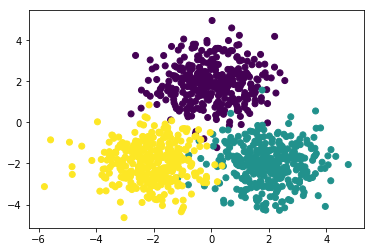

In [75]:
# --- Generate the dataset(taken from example)

def gen_gmm_data(n = 999, plot = True):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
    
    # Plot?
    if plot:
       plt.scatter(xs[:1,:],xs[1:,:], c = cl)

    # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, np.transpose(y), cl

x, y, cl = gen_gmm_data()


### 4.Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [100]:
# --- Loss Function and Forward Propagation

def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return -tot.sum()

def yhat(X,parameters):
     
    W1, B1, W2, B2, V, C = parameters
    
    # Forward pass
    
    a1 = W1.dot(np.transpose(X)) + B1
    H1 = ReLU(a1)
    a2 = W2.dot(H1) + B2
    H2 = ReLU(a2)
    a3 = V.dot(H2) + C
    Y_hat = softmax(a3)
    
    return Y_hat


In [132]:
# --- Grad descent

def grad_descent(x, y, starting_point=None, iterations=20, learning_rate=.1):
    
    W1 = np.random.uniform(-.1,.1,size=6).astype("float128").reshape(3,2)
    B1 = np.random.uniform(-.1,.1,size=3).astype("float128").reshape(3,1)
    W2 = np.random.uniform(-.1,.1,size=6).astype("float128").reshape(2,3)
    B2 = np.random.uniform(-.1,.1,size=2).astype("float128").reshape(2,1)
    V = np.random.uniform(-.1,.1,size=6).astype("float128").reshape(3,2)
    C = np.random.uniform(-.1,.1,size=3).astype("float128").reshape(3,1)
    parameters = [W1, B1, W2, B2, V, C]
    
    trajectory = [parameters]
    losses = [loss(y, yhat(x, parameters))]
    

    
    for i in range(iterations):
        grad = grad_f(x, parameters)
        parameters[0] = parameters[0] - (learning_rate * grad[0])
        parameters[1] = parameters[1] - (learning_rate * grad[1])
        parameters[2] = parameters[2] - (learning_rate * grad[2])
        parameters[3] = parameters[3] - (learning_rate * grad[3])
        parameters[4] = parameters[4] - (learning_rate * grad[4])
        parameters[5] = parameters[5] - (learning_rate * grad[5])
        trajectory.append(parameters)
        losses.append(loss(y, yhat(x, parameters)))
        
    return (np.array(trajectory), losses)

[6899.8827450238595462,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.8480238699049654,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965,
 6899.8480238699049654,
 6899.8480238699049654,
 6899.848023869904965,
 6899.848023869904965,
 6899.848023869904965]

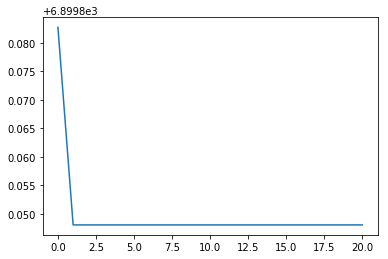

In [133]:
traj, losses = grad_descent(x, y)
plt.plot(losses)
losses

### 5.Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.